In [1]:
import sys
sys.path.append("../src")
import simulation 
import workbench
import architectures
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sim = simulation.ArmAndChangingColorBall()

In [3]:
workbench.SimulationWorkbench(sim);

In [4]:
# We retrieve simulation statistics
X  = sim.sample_all_factors(depth=3,nb_samples=5)
m0 = X[:,:,:,0].mean()
m1 = X[:,:,:,1].mean()
m2 = X[:,:,:,2].mean()

In [5]:
def gen_func():
    coord = np.random.uniform(low=0., high=1., size=sim.nb_params())
    x = sim.draw(list(coord), depth=3)
    x[:,:,0] -= m0
    x[:,:,1] -= m1
    x[:,:,2] -= m2
    return x.ravel(), x.ravel()

In [6]:
%%bash
rm -rf logs/*
#nohup tensorboard --logdir=logs &

In [7]:
network = architectures.VGG16VAE(path_to_logs="logs", lr=1e-3, bn=True, emb_size=10)

In [8]:
network.load_weights("pre_trained/vgg16_weights.h5")

In [9]:
network.train_with_generator(gen_func=gen_func,batch_size=10,iterations=int(2e4))

KeyboardInterrupt: 

In [10]:
workbench.LatentSpaceWorkbench(sim, network)

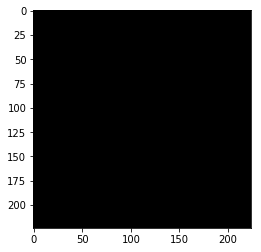

In [13]:
img = network.evaluate_output(np.array(gen_func()))[0].reshape([224,224,3])
plt.imshow(np.log(img))

In [12]:
img

array([[[  1.40258098e+23,   1.22008882e+23,   1.21878458e+23],
        [  2.35815286e+23,   2.02552420e+23,   2.02669585e+23],
        [  2.62037585e+23,   2.22684483e+23,   2.23286254e+23],
        ..., 
        [ -1.39997502e+23,  -1.12441363e+23,  -1.13721628e+23],
        [ -1.12562140e+23,  -8.97070479e+22,  -9.07595481e+22],
        [ -5.69087954e+22,  -4.46447370e+22,  -4.54950437e+22]],

       [[  2.43506714e+23,   2.10422514e+23,   2.09801270e+23],
        [  4.03451838e+23,   3.42961145e+23,   3.43108647e+23],
        [  4.42955613e+23,   3.71818734e+23,   3.72521872e+23],
        ..., 
        [ -2.28500990e+23,  -1.78407433e+23,  -1.80482169e+23],
        [ -1.84144551e+23,  -1.42382392e+23,  -1.44295746e+23],
        [ -9.33684473e+22,  -7.11759108e+22,  -7.25066750e+22]],

       [[  2.77100504e+23,   2.37942264e+23,   2.37612979e+23],
        [  4.53897774e+23,   3.82524655e+23,   3.83201312e+23],
        [  4.93704803e+23,   4.09782566e+23,   4.11333065e+23],
        